In [1]:
from blackscholes import *
from stinepack import stinterp
from SVI import *
from heston import *
from dupire import *

In [2]:
ivolData=pd.read_csv("data/spxOptData.csv").iloc[:,1:]

In [3]:
ivolData

Expiry      Texp  Strike       Bid       Ask          Fwd    CallMid
0    20050917  0.005476     500       NaN  3.864941  1227.798054        NaN
1    20050917  0.005476     600       NaN  3.113717  1227.798054        NaN
2    20050917  0.005476     650       NaN  2.783228  1227.798054        NaN
3    20050917  0.005476     700       NaN  2.476466  1227.798054        NaN
4    20050917  0.005476     750       NaN  2.189885  1227.798054        NaN
..        ...       ...     ...       ...       ...          ...        ...
308  20070616  1.749487    1400  0.129304  0.134588  1277.047414  44.181034
309  20070616  1.749487    1450  0.123209  0.129244  1277.047414  29.202586
310  20070616  1.749487    1500  0.118982  0.123873  1277.047414  18.426724
311  20070616  1.749487    1550  0.114524  0.119618  1277.047414  10.991379
312  20070616  1.749487    1600  0.110767  0.117744  1277.047414   6.465517

[313 rows x 7 columns]

In [3]:
sviGuess=sviSqrtFit(ivolData)
sviMatrix=sviFitQR(ivolData,sviGuess,penaltyFactor=100)

C:\Users\Juston\Forex\notebook\SVI.py:513: RuntimeWarning: overflow encountered in exp
  negVarPenalty = min(100,exp(-1/minVar))
C:\Users\Juston\Forex\notebook\SVI.py:231: RuntimeWarning: divide by zero encountered in true_divide
  temp4 = temp1 / term22 + term23 / temp2
C:\Users\Juston\Forex\notebook\SVI.py:231: RuntimeWarning: invalid value encountered in true_divide
  temp4 = temp1 / term22 + term23 / temp2
C:\Users\Juston\Forex\notebook\SVI.py:235: RuntimeWarning: divide by zero encountered in true_divide
  ee = q3 ** 2 / (2 * q4 ** 2) - (4 * q2) / (3 * q4) - (4 * 2 ** (1 / 3) * term21) / term22 - term23 / (3 * 2 ** (1 / 3) * q4) -          (-q3 ** 3 / 4 + q4 * q3 * q2 - 2 * q4 ** 2 * q1) / (q4 ** 3 * rr)
C:\Users\Juston\Forex\notebook\SVI.py:235: RuntimeWarning: invalid value encountered in true_divide
  ee = q3 ** 2 / (2 * q4 ** 2) - (4 * q2) / (3 * q4) - (4 * 2 ** (1 / 3) * term21) / term22 - term23 / (3 * 2 ** (1 / 3) * q4) -          (-q3 ** 3 / 4 + q4 * q3 * q2 - 2 * q4 ** 2 

In [4]:
texp=unique(ivolData["Texp"])

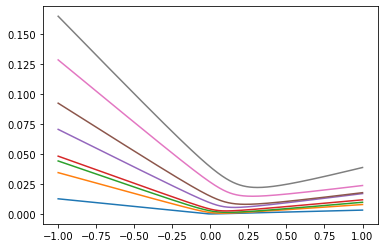

In [5]:
ks=np.linspace(-1.0,1.0,1000)
for idx,row in sviMatrix.iterrows():
    sviparams=SVIPARAMS.load(row)
    sviV=np.vectorize(lambda k:SVI(sviparams,k))
    plt.plot(ks,sviV(ks))

In [6]:
sviW(sviMatrix,texp,k=np.array([0,0.1,0.2]),t=1)

array([0.02043518, 0.0142233 , 0.01146524])

In [7]:
ivolData['Mid']=(ivolData['Bid']+ivolData['Ask'])/2

In [8]:
volmat=pd.pivot_table(ivolData,values='Mid',index='Texp',columns='Strike')

In [9]:
volmat.shape

(8, 73)

## SVI

In [10]:
sviMatrix['texp']=texp
Ks = volmat.columns
Fs = [unique(ivolData[ivolData['Texp']==t]['Fwd']) for t in texp]
logmoney=[log(Ks/F) for F in Fs]

In [11]:
impvol_SVI = pd.DataFrame([sqrt(sviW(sviMatrix,texp,k=np.array(logmoney[i]),t=t)/t)
              for i, t in enumerate(texp)],
                         columns=volmat.columns,
                         index=volmat.index)

In [12]:
volmat - impvol_SVI

Strike        500       550       600       700       750       800   \
Texp                                                                   
0.005476       NaN       NaN       NaN       NaN       NaN       NaN   
0.101300       NaN       NaN       NaN       NaN       NaN       NaN   
0.177960       NaN       NaN       NaN       NaN       NaN       NaN   
0.254620       NaN       NaN       NaN  0.049668  0.024587  0.024349   
0.503765       NaN       NaN       NaN  0.001650       NaN -0.005522   
0.752909  0.038971  0.026284  0.006191 -0.010023 -0.005550 -0.002937   
1.251198       NaN       NaN -0.011983 -0.002696 -0.005171 -0.001180   
1.749487       NaN       NaN       NaN -0.002380 -0.001204 -0.000509   

Strike        825       850       875       900   ...      1310          1325  \
Texp                                              ...                           
0.005476       NaN       NaN       NaN       NaN  ...       NaN           NaN   
0.101300       NaN       NaN       NaN  0.027373  ...  0.012364  1.628946e-02   
0.177960       NaN       NaN       NaN  0.002054  ...       NaN  4.753296e-04   
0.254620       NaN  0.014908       NaN  0.001853  ...       NaN  7.179442e-04   
0.503765 -0.003593 -0.000976 -0.000116 -0.003691  ...       NaN -3.426501e-04   
0.752909       NaN -0.004998       NaN -0.000795  ...       NaN  9.376056e-07   
1.251198       NaN -0.000288       NaN -0.000652  ...       NaN           NaN   
1.749487       NaN -0.000387       NaN  0.000144  ...       NaN           NaN   

Strike        1350      1375      1400      1425      1450      1500  \
Texp                                                                   
0.005476       NaN       NaN       NaN       NaN       NaN       NaN   
0.101300  0.038711       NaN       NaN       NaN       NaN       NaN   
0.177960  0.006812       NaN       NaN       NaN       NaN       NaN   
0.254620 -0.002736  0.002062  0.007504  0.015267       NaN       NaN   
0.503765  0.000203       NaN -0.000422       NaN -0.000726       NaN   
0.752909  0.000288  0.000359  0.000244       NaN -0.000884 -0.002828   
1.251198 -0.000799       NaN  0.000917       NaN  0.000512 -0.000698   
1.749487 -0.000164 -0.000040  0.000125       NaN  0.000287  0.000319   

Strike        1550      1600  
Texp                          
0.005476       NaN       NaN  
0.101300       NaN       NaN  
0.177960       NaN       NaN  
0.254620       NaN       NaN  
0.503765       NaN       NaN  
0.752909       NaN       NaN  
1.251198 -0.001882  0.000077  
1.749487 -0.000352 -0.000598  

[8 rows x 73 columns]

## LV

In [198]:
# input vectors: logstrikes, tenors
kNum=51
tNum=2000
logstrikes=np.linspace(np.min(logmoney)-0.1,np.max(logmoney)+0.1,kNum) 
targettimes=np.linspace(min(texp),max(texp),tNum)

# info from sviMatrix: params for each benchmark tenor, expiration of each tenor
params=[SVIPARAMS.load(sviMatrix.iloc[i,:]) for i in range(sviMatrix.shape[0])]
times=sviMatrix.texp.to_numpy()
ys=np.array([SVI(param,logstrikes) for param in params]) # SVI takes the vector logstrikes, returns impvol of each benchmark tenor

# impvol surface: use stineman interpolation to find values between benchmark tenors, stinterp takes the vector targettimes
U=np.zeros((tNum,kNum))
for i in range(len(logstrikes)):
    U[:,i]=stinterp(times,ys[:,i],targettimes)['y'] 

'''    
U,dUdk,d2Udk2,dUdT=do_finite_difference(U,logstrikes,targettimes)
'''

# LV surface
dup=Dupire(U,logstrikes,targettimes)

In [199]:
S0=Fs[0]

In [200]:
temp=pd.DataFrame([[dup.get(t=t,k=k) for k in logmoney[i]] for i,t in enumerate(volmat.index)],
             index=volmat.index,columns=volmat.columns)

In [201]:
res=np.zeros((len(logstrikes),len(targettimes)+1))
res[0,:]=S0 * (1-exp(logstrikes[0]))
res[-1,:]=0
res[:,0]=(S0 * (1-exp(logstrikes)))*((S0 * (1-exp(logstrikes)))>0)

In [202]:
dt=diff(targettimes)[0]
dx=diff(logstrikes)[0]

In [203]:
As=dup.mat.T * dt/4/dx * (-1)
Bs=dup.mat.T * dt/2/dx**2
As,Bs=As.values,Bs.values
coefP=As+Bs
coefC=1-2*Bs
coefM=Bs-As

coefP2=-As-Bs
coefC2=1+2*Bs
coefM2=As-Bs

In [204]:
# Explicit matrix
'''
for j in range(len(targettimes)):
    one=coefM[1:,j]
    two=coefC[:,j]
    thr=coefP[:-1,j]
    OP=diags([one, two, thr], [-1,0,1])
    res[:,j+1] = OP @ res[:,j]
    res[0,j+1] = S0 * (1-exp(logstrikes[0]))
    res[-1,j+1] = 0
'''
# Explicit simple
'''
for j in range(len(targettimes)):
    for i in range(1, len(logstrikes)-1):
        var=dup.mat.iloc[j,i]
        A = -dt /4/dx*var
        B = dt/2/dx/dx*var
        res[i,j+1]=(A+B)*res[i+1,j] + (1-2*B)*res[i,j] + (B-A)*res[i-1,j]
'''

'\nfor j in range(len(targettimes)):\n    for i in range(1, len(logstrikes)-1):\n        var=dup.mat.iloc[j,i]\n        A = -dt /4/dx*var\n        B = dt/2/dx/dx*var\n        res[i,j+1]=(A+B)*res[i+1,j] + (1-2*B)*res[i,j] + (B-A)*res[i-1,j]\n'

In [205]:
from scipy.sparse.linalg import spsolve

In [206]:
for j in range(len(targettimes)):
    # explicit
    one=coefM[1:,j]
    two=coefC[:,j]
    thr=coefP[:-1,j]
    OP=diags([one, two, thr], [-1,0,1])
    explicit= OP @ res[:,j]

    # implicit
    one=coefM2[1:,j]
    two=coefC2[:,j]
    thr=coefP2[:-1,j]
    OP=diags([one, two, thr], [-1,0,1])
    tmp=np.zeros(res.shape[0]); tmp[0]=(As[0,j]-Bs[0,j])*res[0,j+1]; tmp[-1]=(As[-1,j]-Bs[-1,j])*res[-1,j+1]; 
    implicit = spsolve(OP, res[:,j] - tmp)
    
    res[:,j+1] = (explicit+implicit)/2.0
    res[0,j+1] = S0 * (1-exp(logstrikes[0]))
    res[-1,j+1] = 0

C:\Users\Juston\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [207]:
pricemat=pd.DataFrame(res,index=logstrikes,columns=np.array([0]+list(targettimes)))

In [208]:
pricemat

0.000000      0.005476      0.006348      0.007221      0.008093  \
-1.037698  792.826882  7.928269e+02  7.928269e+02  7.928269e+02  7.928269e+02   
-1.009648  780.453397  7.797991e+02  7.796765e+02  7.795282e+02  7.794620e+02   
-0.981599  767.727928  7.675168e+02  7.671919e+02  7.670646e+02  7.669196e+02   
-0.953549  754.640462  7.545734e+02  7.544527e+02  7.542840e+02  7.541816e+02   
-0.925500  741.180701  7.411597e+02  7.411165e+02  7.410467e+02  7.409541e+02   
-0.897450  727.338055  7.273316e+02  7.273166e+02  7.272894e+02  7.272483e+02   
-0.869400  713.101631  7.130997e+02  7.130946e+02  7.130845e+02  7.130676e+02   
-0.841351  698.460229  6.984597e+02  6.984580e+02  6.984544e+02  6.984478e+02   
-0.813301  683.402327  6.834022e+02  6.834017e+02  6.834004e+02  6.833980e+02   
-0.785252  667.916077  6.679160e+02  6.679159e+02  6.679155e+02  6.679146e+02   
-0.757202  651.989296  6.519893e+02  6.519893e+02  6.519891e+02  6.519889e+02   
-0.729152  635.609450  6.356095e+02  6.356095e+02  6.356094e+02  6.356094e+02   
-0.701103  618.763653  6.187637e+02  6.187637e+02  6.187637e+02  6.187637e+02   
-0.673053  601.438648  6.014387e+02  6.014387e+02  6.014387e+02  6.014387e+02   
-0.645004  583.620804  5.836208e+02  5.836208e+02  5.836208e+02  5.836209e+02   
-0.616954  565.296103  5.652961e+02  5.652961e+02  5.652961e+02  5.652962e+02   
-0.588905  546.450124  5.464501e+02  5.464502e+02  5.464502e+02  5.464502e+02   
-0.560855  527.068040  5.270681e+02  5.270681e+02  5.270681e+02  5.270681e+02   
-0.532805  507.134599  5.071346e+02  5.071346e+02  5.071346e+02  5.071347e+02   
-0.504756  486.634119  4.866341e+02  4.866341e+02  4.866342e+02  4.866342e+02   
-0.476706  465.550468  4.655505e+02  4.655505e+02  4.655505e+02  4.655505e+02   
-0.448657  443.867058  4.438671e+02  4.438671e+02  4.438671e+02  4.438671e+02   
-0.420607  421.566826  4.215668e+02  4.215669e+02  4.215669e+02  4.215669e+02   
-0.392557  398.632227  3.986322e+02  3.986323e+02  3.986323e+02  3.986323e+02   
-0.364508  375.045215  3.750452e+02  3.750452e+02  3.750452e+02  3.750453e+02   
-0.336458  350.787231  3.507872e+02  3.507873e+02  3.507873e+02  3.507873e+02   
-0.308409  325.839188  3.258392e+02  3.258392e+02  3.258392e+02  3.258392e+02   
-0.280359  300.181455  3.001815e+02  3.001815e+02  3.001815e+02  3.001815e+02   
-0.252310  273.793846  2.737939e+02  2.737939e+02  2.737939e+02  2.737939e+02   
-0.224260  246.655597  2.466556e+02  2.466556e+02  2.466556e+02  2.466556e+02   
-0.196210  218.745354  2.187454e+02  2.187454e+02  2.187454e+02  2.187454e+02   
-0.168161  190.041159  1.900412e+02  1.900412e+02  1.900412e+02  1.900412e+02   
-0.140111  160.520424  1.605204e+02  1.605204e+02  1.605204e+02  1.605205e+02   
-0.112062  130.159922  1.301599e+02  1.301599e+02  1.301600e+02  1.301600e+02   
-0.084012   98.935765  9.893582e+01  9.893595e+01  9.893622e+01  9.893669e+01   
-0.055962   66.823385  6.682401e+01  6.682562e+01  6.682825e+01  6.683187e+01   
-0.027913   33.797514  3.380865e+01  3.382426e+01  3.384319e+01  3.386472e+01   
 0.000137   -0.000000  1.682725e-01  3.344803e-01  4.992757e-01  6.628601e-01   
 0.028186   -0.000000  7.609340e-04  2.757832e-03  5.713133e-03  9.450658e-03   
 0.056236   -0.000000  6.365679e-06  2.249108e-05  5.518256e-05  1.083327e-04   
 0.084285   -0.000000  4.023685e-08  1.599981e-07  4.297136e-07  9.472535e-07   
 0.112335   -0.000000  2.446624e-10  1.091232e-09  3.264324e-09  7.953872e-09   
 0.140385   -0.000000  1.764559e-12  8.775272e-12  2.900096e-11  7.769699e-11   
 0.168434   -0.000000  1.655010e-14  9.117798e-14  3.303601e-13  9.650378e-13   
 0.196484   -0.000000  2.040100e-16  1.237028e-15  4.879257e-15  1.542666e-14   
 0.224533   -0.000000  3.231957e-18  2.142569e-17  9.137314e-17  3.105317e-16   
 0.252583   -0.000000  6.349344e-20  4.571161e-19  2.094037e-18  7.600589e-18   
 0.280633   -0.000000  1.497943e-21  1.164101e-20  5.695833e-20  2.195885e-19   
 0.308682   -0.000000  4.140167e-23  3.45473

In [209]:
def LV_linterp(df, t, k):
    t2=df.index.searchsorted(t); t1=t2-1
    k2=df.columns.searchsorted(k); k1=k2-1
    return (df.iloc[t1,k1] + df.iloc[t1,k2] + df.iloc[t2,k1] + df.iloc[t2,k2])/4.0

In [210]:
LV_linterp(pricemat.T, t=1, k=0)

79.68888343660078

In [211]:
impvol_SVI

Strike        500       550       600       700       750       800   \
Texp                                                                   
0.005476  1.437717  1.358156  1.281217  1.132153  1.058664  0.984973   
0.101300  0.552884  0.522433  0.493019  0.436176  0.408256  0.380365   
0.177960  0.473228  0.447900  0.423488  0.376495  0.353531  0.330691   
0.254620  0.414584  0.393597  0.373421  0.334755  0.315955  0.297327   
0.503765  0.358417  0.341410  0.325123  0.294119  0.279168  0.264451   
0.752909  0.336805  0.321406  0.306694  0.278809  0.265432  0.252322   
1.251198  0.310487  0.297407  0.284955  0.261493  0.250312  0.239407   
1.749487  0.299222  0.287170  0.275729  0.254272  0.244103  0.234229   

Strike        825       850       875       900   ...      1310      1325  \
Texp                                              ...                       
0.005476  0.947825  0.910340  0.872405  0.833890  ...  0.187914  0.204466   
0.101300  0.366357  0.352266  0.338061  0.323706  ...  0.081470  0.080497   
0.177960  0.319267  0.307810  0.296302  0.284720  ...  0.093873  0.091159   
0.254620  0.288037  0.278742  0.269424  0.260068  ...  0.103883  0.101844   
0.503765  0.257154  0.249884  0.242631  0.235385  ...  0.117542  0.114554   
0.752909  0.245845  0.239410  0.233010  0.226638  ...  0.126463  0.123565   
1.251198  0.234041  0.228724  0.223451  0.218216  ...  0.136479  0.133872   
1.749487  0.229388  0.224604  0.219872  0.215189  ...  0.144452  0.142204   

Strike        1350      1375      1400      1425      1450      1500  \
Texp                                                                   
0.005476  0.229285  0.251424  0.271495  0.289910  0.306960  0.337786   
0.101300  0.081093  0.083686  0.087528  0.092082  0.097000  0.107141   
0.177960  0.088271  0.087163  0.087470  0.088830  0.090937  0.096490   
0.254620  0.099999  0.099696  0.100476  0.101975  0.103930  0.108569   
0.503765  0.110404  0.107346  0.105333  0.104229  0.103861  0.104678   
0.752909  0.119125  0.115236  0.111942  0.109254  0.107148  0.104471   
1.251198  0.129726  0.125882  0.122399  0.119326  0.116692  0.112738   
1.749487  0.138570  0.135100  0.131821  0.128759  0.125940  0.121108   

Strike        1550      1600  
Texp                          
0.005476  0.365174  0.389887  
0.101300  0.117068  0.126488  
0.177960  0.102885  0.109498  
0.254620  0.113591  0.118646  
0.503765  0.106750  0.109460  
0.752909  0.103396  0.103421  
1.251198  0.110324  0.109071  
1.749487  0.117422  0.114853  

[8 rows x 73 columns]

In [212]:
tmp=pd.DataFrame([[BSImpliedVolCall(S0, S0*exp(k), T=t, r=0, C=LV_linterp(pricemat.T, t=t, k=k))[0] 
 for k in log(volmat.columns/S0)]
 for t in texp],
                index=volmat.index,
                columns=volmat.columns)

In [213]:
tmp-volmat

Strike        500      550       600       700       750       800       825   \
Texp                                                                            
0.005476       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
0.101300       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
0.177960       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
0.254620       NaN      NaN       NaN  0.332668 -0.340542  0.183717       NaN   
0.503765       NaN      NaN       NaN  0.215221       NaN  0.106452  0.120657   
0.752909  0.205432 -0.34769 -0.312885  0.153637 -0.259882  0.061588       NaN   
1.251198       NaN      NaN -0.272972  0.081721 -0.030554  0.027925       NaN   
1.749487       NaN      NaN       NaN  0.051657 -0.020487  0.014498       NaN   

Strike        850       875       900   ...      1310      1325      1350  \
Texp                                    ...                                 
0.005476       NaN       NaN       NaN  ...       NaN       NaN       NaN   
0.101300       NaN       NaN  0.384317  ... -0.004353  0.006162 -0.021739   
0.177960       NaN       NaN  0.269055  ...       NaN  0.013753  0.000572   
0.254620  0.217510       NaN  0.204333  ...       NaN  0.008876  0.004339   
0.503765  0.121733  0.116673  0.110313  ...       NaN  0.005727 -0.003791   
0.752909  0.080642       NaN  0.068201  ...       NaN  0.002874 -0.006375   
1.251198  0.039480       NaN  0.036346  ...       NaN       NaN -0.007699   
1.749487  0.024034       NaN  0.021827  ...       NaN       NaN -0.009857   

Strike        1375      1400    1425      1450      1500      1550      1600  
Texp                                                                          
0.005476       NaN       NaN     NaN       NaN       NaN       NaN       NaN  
0.101300       NaN       NaN     NaN       NaN       NaN       NaN       NaN  
0.177960       NaN       NaN     NaN       NaN       NaN       NaN       NaN  
0.254620 -0.004281  0.002779 -0.0093       NaN       NaN       NaN       NaN  
0.503765       NaN  0.005573     NaN  0.010678       NaN       NaN       NaN  
0.752909 -0.012737  0.002167     NaN  0.008582  0.000116       NaN       NaN  
1.251198       NaN -0.001652     NaN  0.004063 -0.005330 -0.000377  0.000110  
1.749487 -0.016156 -0.003234     NaN  0.001652 -0.009231 -0.004609 -0.001684  

[8 rows x 73 columns]

## SV

In [286]:
def calibrate_Heston(ivolData, guess):
    ivolData=ivolData[ivolData.Texp!=texp[0]]
    df_input=ivolData[['Texp','Strike','Fwd','Mid']].dropna()
    df_input['logmoney']=log(df_input['Strike']/df_input['Fwd'])
    vols_mkt=df_input.Mid.values
    
    
    def inner(five):
        x1,x2,x3,x4,x5=five
        vbar=exp(x1)
        rho=tanh(x2)
        eta=exp(x3)
        lbd=exp(x4)
        theta=exp(x5)
        phi=phiHeston(lbd=lbd, rho=rho, eta=eta, vbar=vbar, v=theta)
        # TODO: multiple time slices fitted together; glue each t's result together
        impVols=df_input.apply(lambda row: impvolPhi(phi)(k=row['logmoney'], t=row['Texp'])[0], axis=1).values
        return square(subtract(impVols,vols_mkt))
    
    res=least_squares(inner, guess, method='lm').x
    
    vbar=exp(res[0])
    rho=tanh(res[1])
    eta=exp(res[2])
    lbd=exp(res[3])
    theta=exp(res[4])
    
    phi=phiHeston(lbd=lbd, rho=rho, eta=eta, vbar=vbar, v=theta)
    return phi, vbar,rho,eta,lbd,theta

In [288]:
res=calibrate_Heston(ivolData, [log(0.01), 0, log(0.05), log(10), log(0.08)])

In [309]:
impvol_heston = pd.DataFrame([[impvolPhi(res[0])(k=k,t=t)[0] for k in np.array(logmoney[i])]
              for i, t in enumerate(texp)],
                         columns=volmat.columns,
                         index=volmat.index)

C:\Users\Juston\Forex\notebook\heston.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(real_func, a, b)[0]


In [310]:
impvol_heston - volmat

Strike        500       550       600       700       750       800   \
Texp                                                                   
0.005476       NaN       NaN       NaN       NaN       NaN       NaN   
0.101300       NaN       NaN       NaN       NaN       NaN       NaN   
0.177960       NaN       NaN       NaN       NaN       NaN       NaN   
0.254620       NaN       NaN       NaN -0.027572 -0.003395 -0.004157   
0.503765       NaN       NaN       NaN  0.020644       NaN  0.023394   
0.752909 -0.021434 -0.010463  0.007970  0.020986  0.014959  0.010814   
1.251198       NaN       NaN  0.009076 -0.001405  0.000568 -0.003862   
1.749487       NaN       NaN       NaN -0.013173 -0.013751 -0.013811   

Strike        825       850       875       900   ...     1310      1325  \
Texp                                              ...                      
0.005476       NaN       NaN       NaN       NaN  ...      NaN       NaN   
0.101300       NaN       NaN       NaN -0.044508  ...  0.00078  0.000882   
0.177960       NaN       NaN       NaN  0.004178  ...      NaN  0.002379   
0.254620       NaN  0.004160       NaN  0.015931  ...      NaN -0.009066   
0.503765  0.020333  0.016570  0.014546  0.016938  ...      NaN -0.011517   
0.752909       NaN  0.011359       NaN  0.005646  ...      NaN -0.009918   
1.251198       NaN -0.005130       NaN -0.005080  ...      NaN       NaN   
1.749487       NaN -0.013261       NaN -0.013078  ...      NaN       NaN   

Strike        1350      1375      1400      1425      1450      1500  \
Texp                                                                   
0.005476       NaN       NaN       NaN       NaN       NaN       NaN   
0.101300 -0.016688       NaN       NaN       NaN       NaN       NaN   
0.177960  0.002801       NaN       NaN       NaN       NaN       NaN   
0.254620 -0.001998 -0.003462 -0.006148 -0.011712       NaN       NaN   
0.503765 -0.011472       NaN -0.007556       NaN -0.003604       NaN   
0.752909 -0.010564 -0.010516 -0.009784       NaN -0.006338 -0.001554   
1.251198 -0.004897       NaN -0.006610       NaN -0.006350 -0.005350   
1.749487 -0.005112 -0.004920 -0.004825       NaN -0.004675 -0.004711   

Strike        1550      1600  
Texp                          
0.005476       NaN       NaN  
0.101300       NaN       NaN  
0.177960       NaN       NaN  
0.254620       NaN       NaN  
0.503765       NaN       NaN  
0.752909       NaN       NaN  
1.251198 -0.004310 -0.006273  
1.749487 -0.004355 -0.004673  

[8 rows x 73 columns]

In [311]:
ivolData


Expiry      Texp  Strike       Bid       Ask          Fwd    CallMid  \
0    20050917  0.005476     500       NaN  3.864941  1227.798054        NaN   
1    20050917  0.005476     600       NaN  3.113717  1227.798054        NaN   
2    20050917  0.005476     650       NaN  2.783228  1227.798054        NaN   
3    20050917  0.005476     700       NaN  2.476466  1227.798054        NaN   
4    20050917  0.005476     750       NaN  2.189885  1227.798054        NaN   
..        ...       ...     ...       ...       ...          ...        ...   
308  20070616  1.749487    1400  0.129304  0.134588  1277.047414  44.181034   
309  20070616  1.749487    1450  0.123209  0.129244  1277.047414  29.202586   
310  20070616  1.749487    1500  0.118982  0.123873  1277.047414  18.426724   
311  20070616  1.749487    1550  0.114524  0.119618  1277.047414  10.991379   
312  20070616  1.749487    1600  0.110767  0.117744  1277.047414   6.465517   

          Mid  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
308  0.131946  
309  0.126227  
310  0.121428  
311  0.117071  
312  0.114256  

[313 rows x 8 columns]